In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Diwali Sales Data.csv',encoding='unicode escape')

In [3]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


# Data Cleaning


In [4]:
# droped unwanted/blank columns..
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [5]:
# checking columns with null values...
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [6]:
# droping null values
df.dropna(inplace=True)

In [7]:
# changing datatype of 'Amount' column 
df['Amount']=df['Amount'].astype('int')

In [8]:
df[['Age','Amount','Orders']].describe()

,Age,Amount,Orders
count,11239.000000,11239.000000,11239.000000
mean,35.410357,9453.610553,2.489634
std,12.753866,5222.355168,1.114967
min,12.000000,188.000000,1.000000
25%,27.000000,5443.000000,2.000000
50%,33.000000,8109.000000,2.000000
75%,43.000000,12675.000000,3.000000
max,92.000000,23952.000000,4.000000


# Data Visualization

# Gender

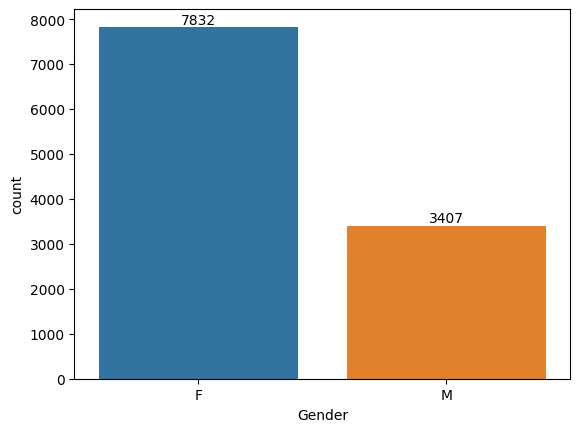

In [9]:
# plotting bar chart for gender and it's count
ax=sns.countplot(x='Gender',data=df)
for i in ax.containers:
    ax.bar_label(i)

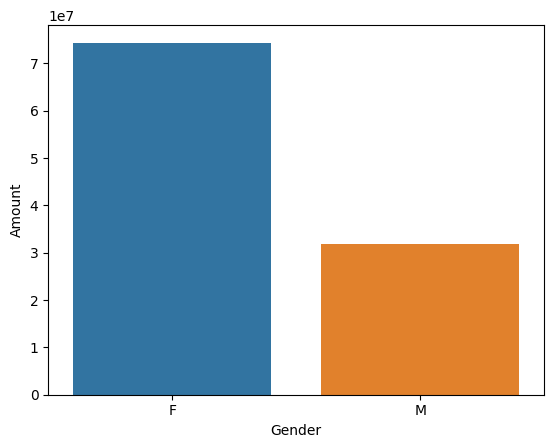

In [10]:
# plotting bar chart for gender and amount spend by it..
am=df.groupby('Gender',as_index=False)['Amount'].sum()

sales_gen=sns.barplot(x='Gender',y='Amount',data=am)


  In the above charts we can clearly see that most of the buyers are females and their purchasing power is also more than mens 

# Age Group

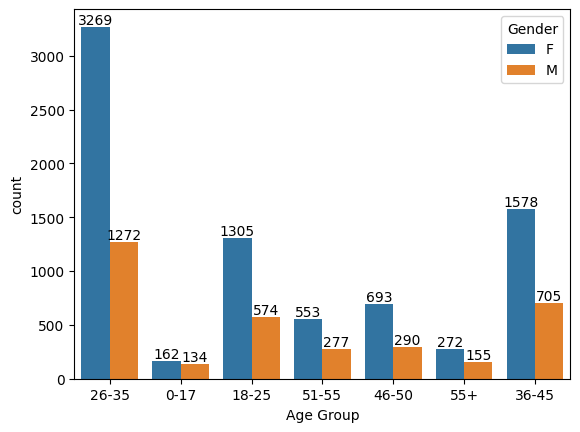

In [11]:

ax=sns.countplot(x='Age Group',data=df,hue='Gender')
for i in ax.containers:
    ax.bar_label(i)

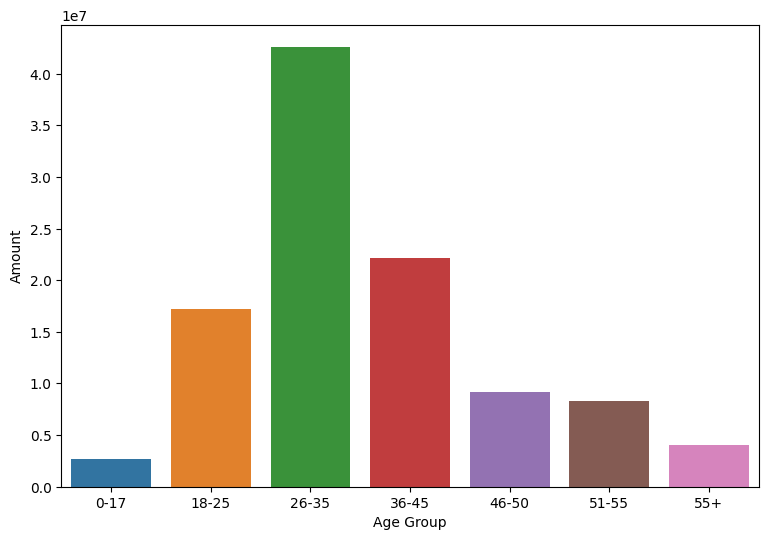

In [12]:
# Total amount vs Age group
sa=df.groupby('Age Group',as_index=False)['Amount'].sum()
plt.figure(figsize=(9,6))
sales_age=sns.barplot(x='Age Group',y='Amount',data=sa)


In the above charts we can see that highest number of customers are between age group of 26-35 and are females.

# Marital Status

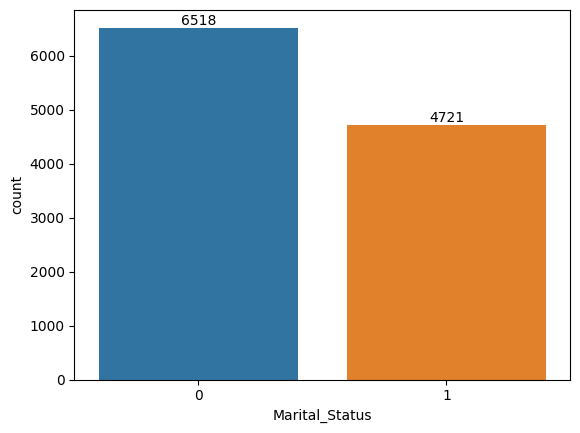

In [13]:
# bar chart to represent marital Status count
ms=sns.countplot(x='Marital_Status',data=df)
for i in ms.containers:
    ms.bar_label(i)

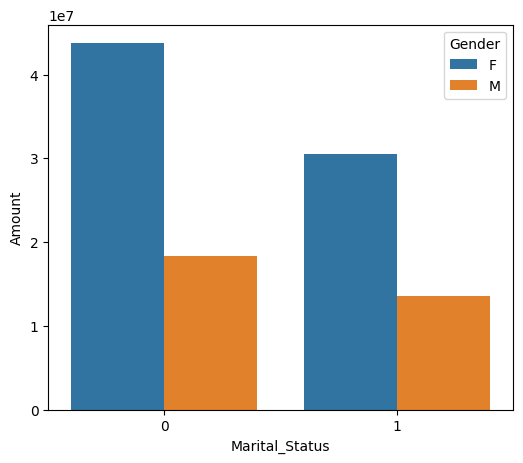

In [14]:
# bar charts to represent amount spend by gender with their marital status..
Ma=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum()
plt.figure(figsize=(6,5))
Sales_MS=sns.barplot(x='Marital_Status',y='Amount',data=Ma,hue='Gender')


Most of the buyers are married womens with high purchasing power

# State

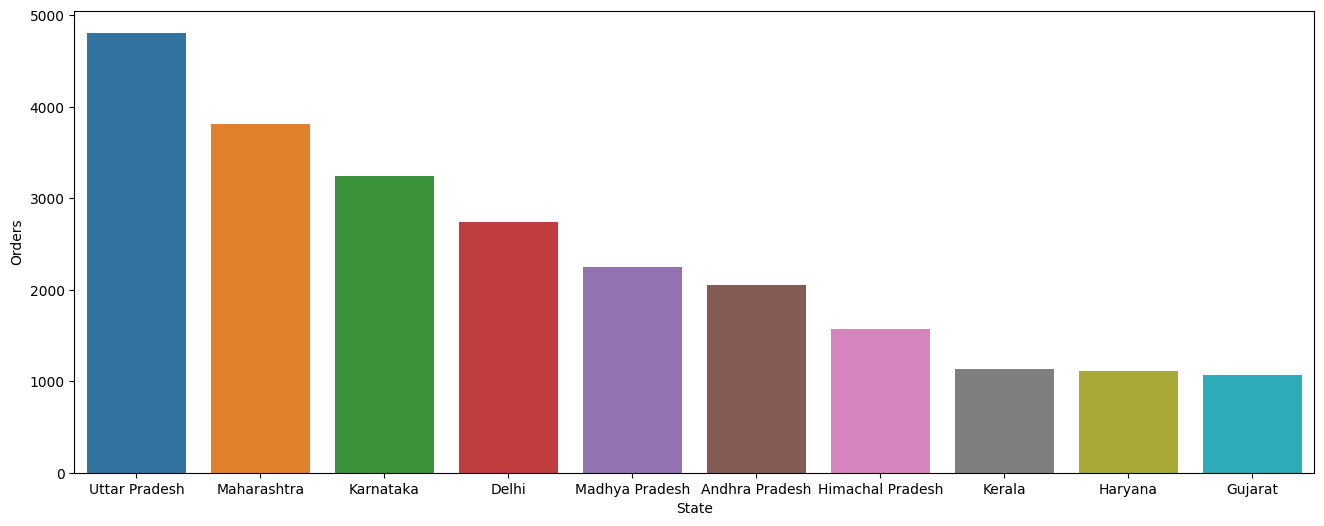

In [15]:
# state vs order
so=df.groupby('State',as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
plt.figure(figsize=(16,6))
State_order=sns.barplot(x='State',y='Orders',data=so)

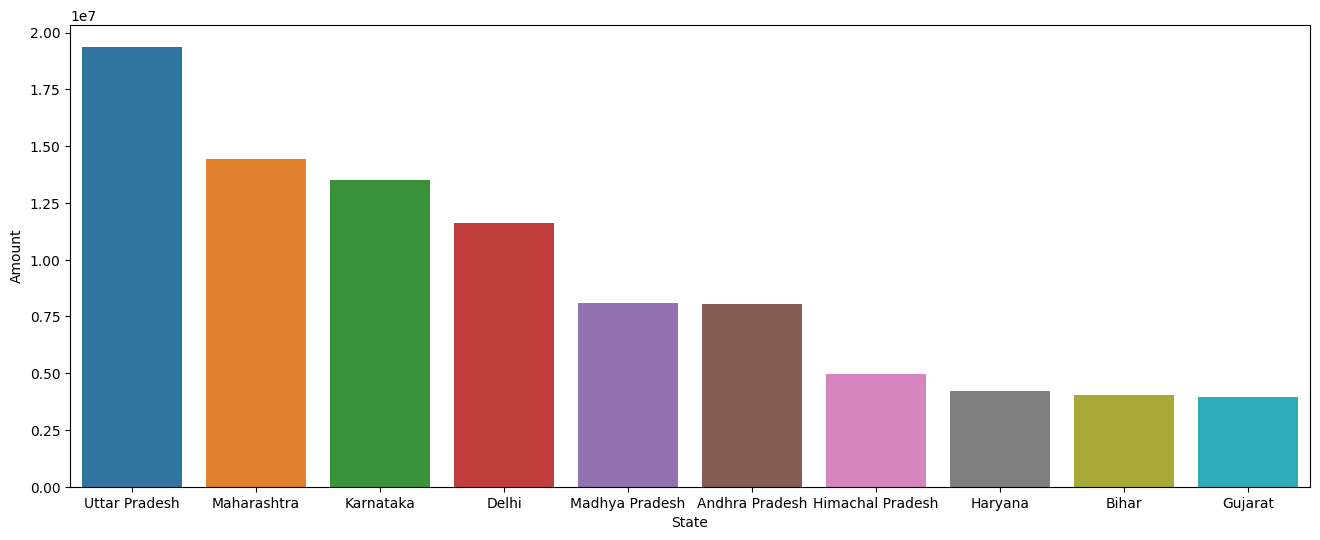

In [16]:
# status vs amount/sales
sa=df.groupby('State',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
plt.figure(figsize=(16,6))
State_order=sns.barplot(x='State',y='Amount',data=sa)

Maximum orders and sales/amount are from Uttar Pradesh,Maharashtra,Karnataka. 

# Occupation

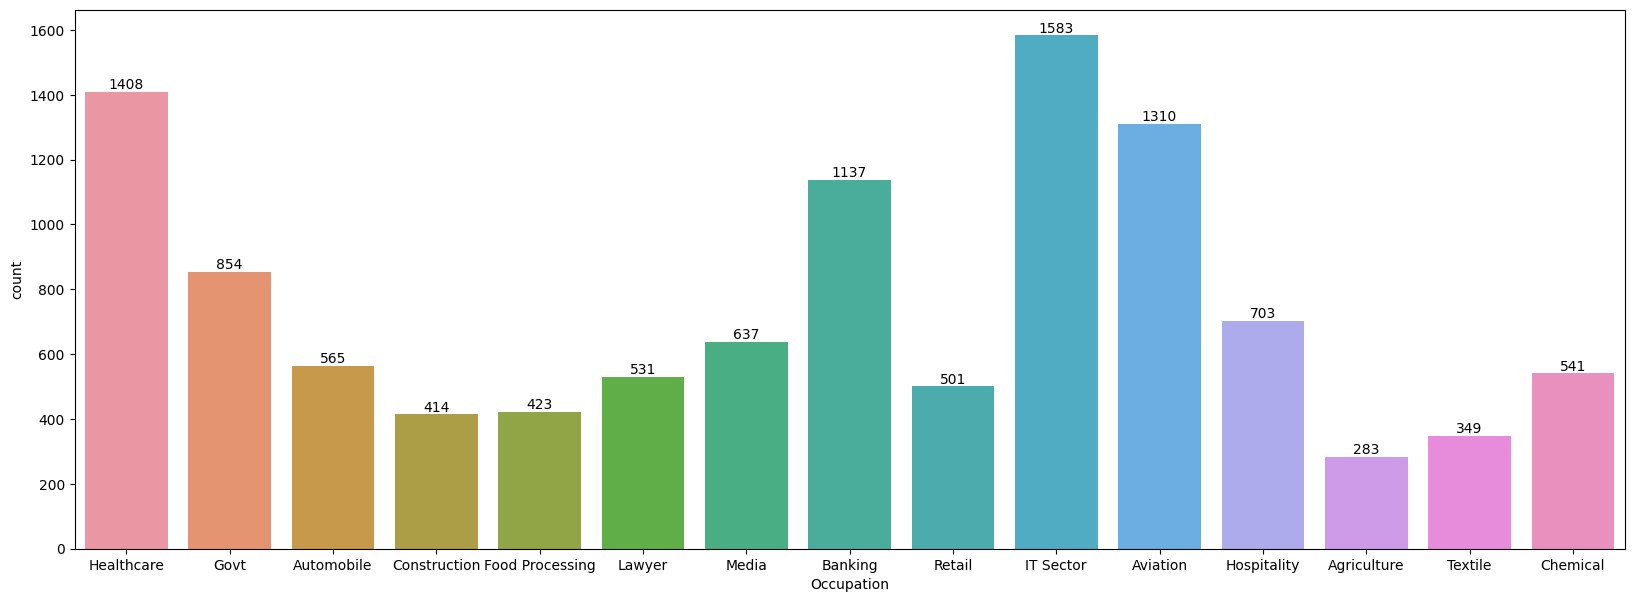

In [17]:
# Occupations with their count
plt.figure(figsize=(20,7))
Oc=sns.countplot(x='Occupation',data=df)
for i in Oc.containers:
    Oc.bar_label(i)

<Axes: xlabel='Occupation', ylabel='Amount'>

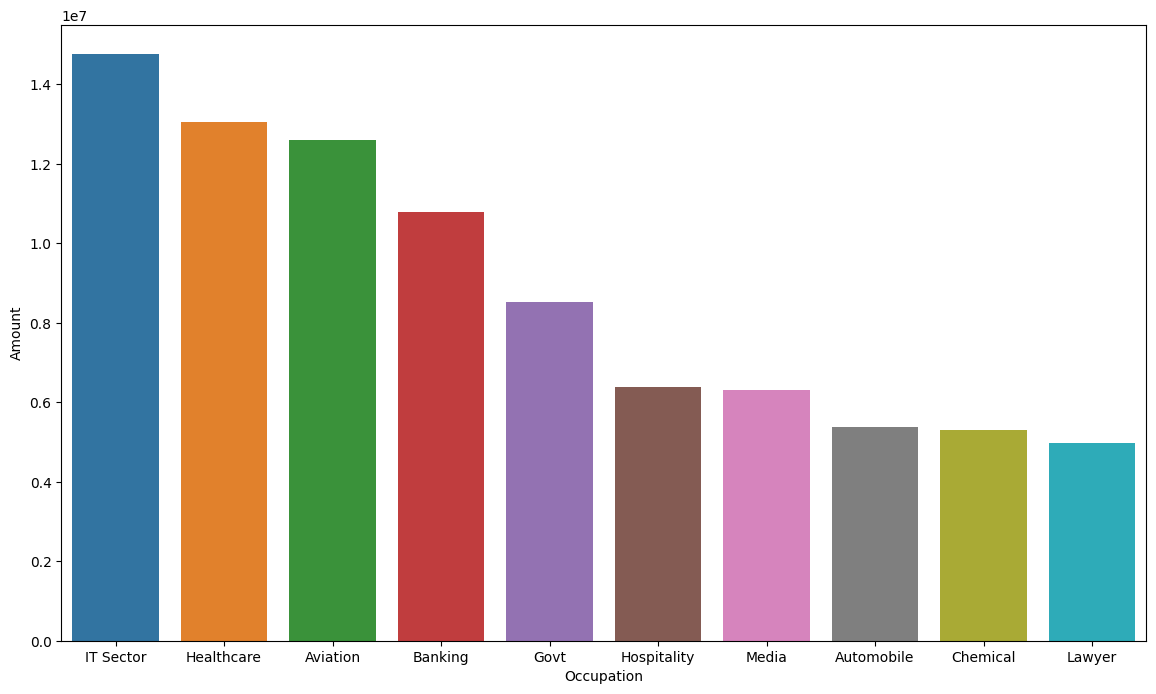

In [18]:
# Occupation vs Total sales/amount
Oa=df.groupby('Occupation',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
plt.figure(figsize=(14,8))
sns.barplot(x='Occupation',y='Amount',data=Oa)


Most of the buyers are from IT Sector,Healthcare,Aviation with high purchasing power.

# Product Category

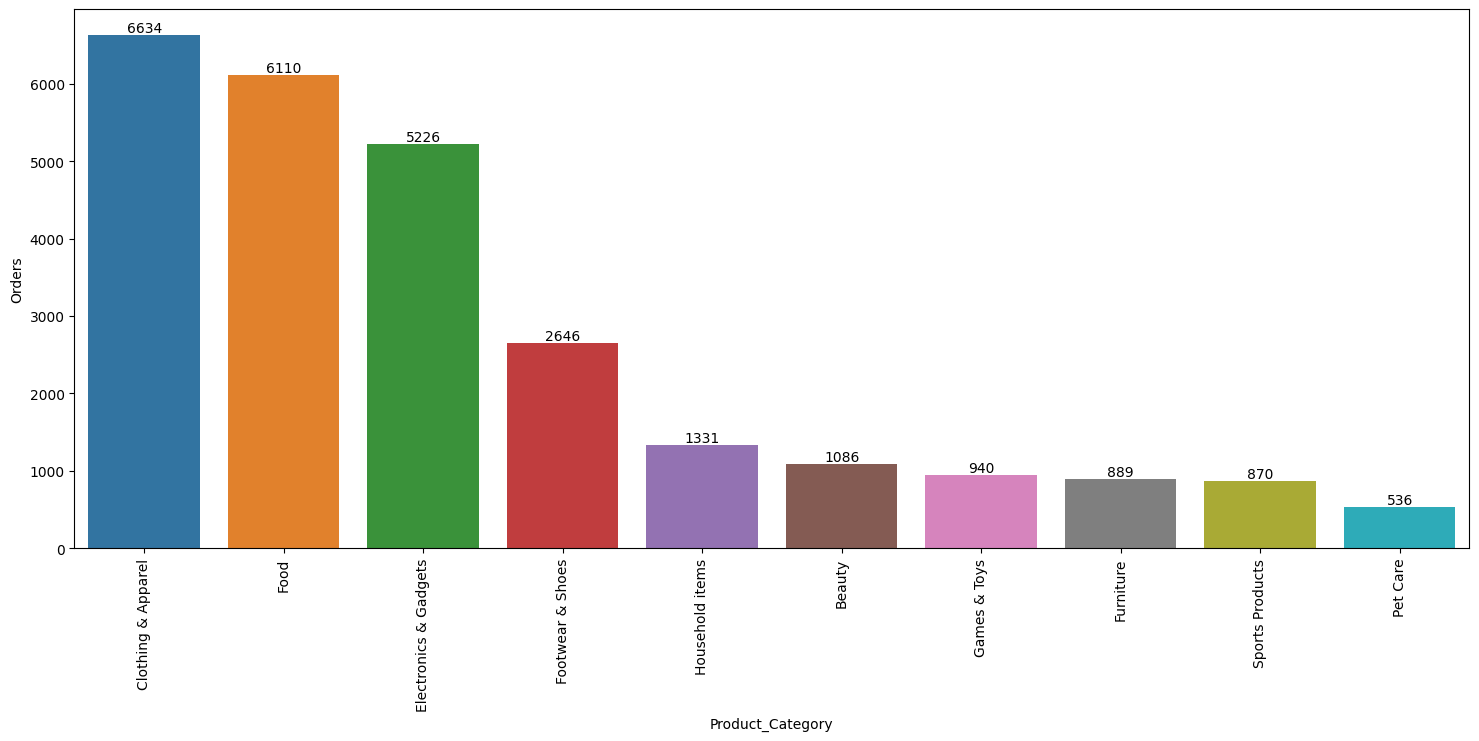

In [19]:
# Product_category vs total orders
do=df.groupby('Product_Category',as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
plt.figure(figsize=(18,7))

pc=sns.barplot(x='Product_Category',y='Orders',data=do)
pc.set_xticklabels(pc.get_xticklabels(),rotation=90)

for i in pc.containers:
    pc.bar_label(i)

[Text(0, 0, 'Food'),
 Text(1, 0, 'Clothing & Apparel'),
 Text(2, 0, 'Electronics & Gadgets'),
 Text(3, 0, 'Footwear & Shoes'),
 Text(4, 0, 'Furniture'),
 Text(5, 0, 'Games & Toys'),
 Text(6, 0, 'Sports Products'),
 Text(7, 0, 'Beauty'),
 Text(8, 0, 'Auto'),
 Text(9, 0, 'Stationery')]

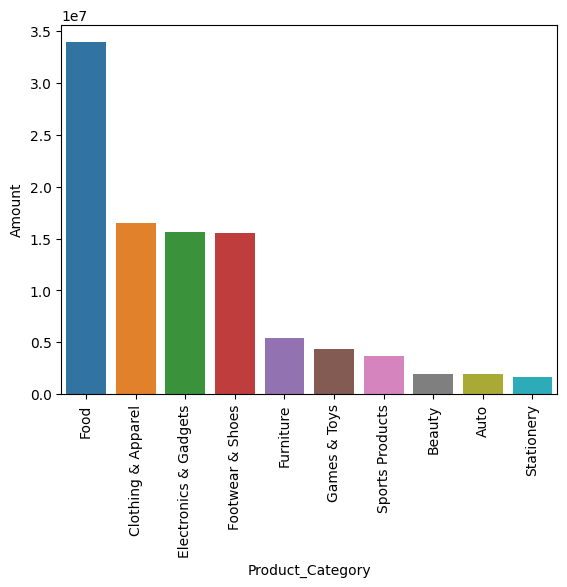

In [20]:
# Product_category vs Total sales 
pca=df.groupby('Product_Category',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
Prod_sale=sns.barplot(x='Product_Category',y='Amount',data=pca)
Prod_sale.set_xticklabels(Prod_sale.get_xticklabels(),rotation=90)


Maximum number of buyers are ordering Food,Clothing & Apparel,Electronics & Gadgets

# Conclusion:

Married women's with age between 26-35 from UP,Maharastra and Karnataka working in IT Sector,Healthcare and Aviation are spend more on Food,Clothing and Electronics.